In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [60]:
df = pd.read_csv(r'F:\JUPYTER\notbook\trainingn\csv\1632560262896716.csv')

In [61]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [62]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


missing data
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


unique values
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]


duplicates data
0






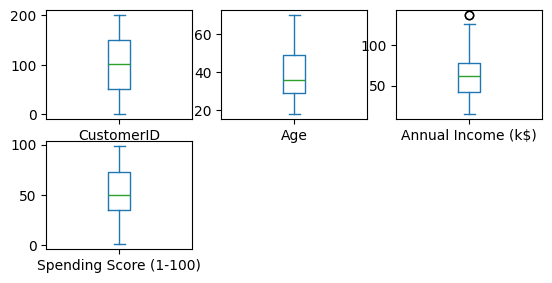

In [63]:
print('missing data')
missing_data = df.isnull().sum()
print(missing_data)

print('\n'*1)
print('unique values')
for i in df.columns:
    unique_values = df[i].unique()
print(unique_values)

print('\n'*1)
print('duplicates data')
duplicates = df.duplicated()
print(duplicates.sum())

print('\n'*1)
df.dtypes

print('\n')
df.plot( kind='box', subplots=True , layout= (3,3) , sharex=False , sharey=False)
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler
df=df.drop(['Gender','CustomerID'] , axis=1)
X = df.values[:,1:]
X = np.nan_to_num(X)
x_s = StandardScaler().fit_transform(X)
x=pd.DataFrame(x_s , columns=df.columns[1:])

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

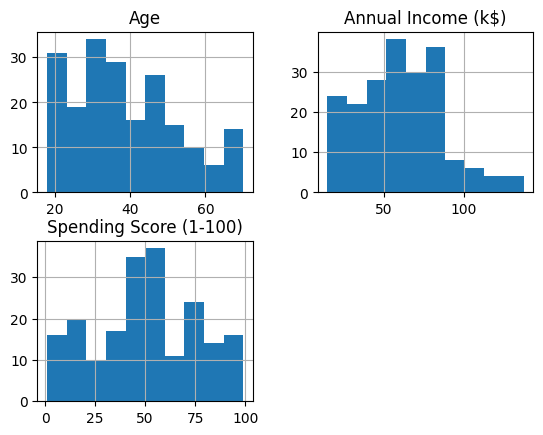

In [65]:
df.hist()

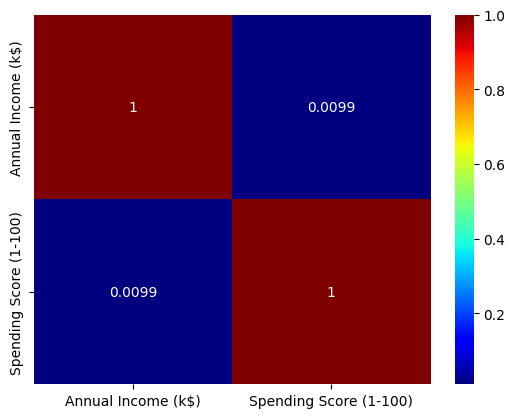

In [66]:
correlation = x.corr()

sns.heatmap(data=correlation , annot=True, cmap='jet')
plt.show()

# k_means

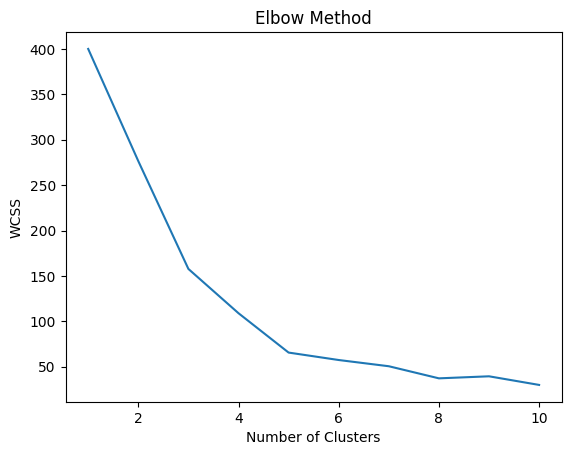

In [67]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
from sklearn.cluster import KMeans
from collections import Counter

km = KMeans(n_clusters=9 , init='k-means++' , max_iter=300 , n_init=10 , random_state=0)
km.fit(x_s)

labels = km.labels_

y_means = km.predict(x_s)

counter = Counter(y_means)

for element, count in counter.items():
    print(f"عنصر {element} تعداد {count} بار آمده است.")

عنصر 0 تعداد 11 بار آمده است.
عنصر 3 تعداد 21 بار آمده است.
عنصر 7 تعداد 12 بار آمده است.
عنصر 6 تعداد 42 بار آمده است.
عنصر 1 تعداد 42 بار آمده است.
عنصر 5 تعداد 29 بار آمده است.
عنصر 2 تعداد 23 بار آمده است.
عنصر 8 تعداد 10 بار آمده است.
عنصر 4 تعداد 10 بار آمده است.


In [69]:
df["labels"] = labels
df.head(5)

,Age,Annual Income (k$),Spending Score (1-100),labels
0,19,15,39,0
1,21,15,81,3
2,20,16,6,7
3,23,16,77,3
4,31,17,40,0


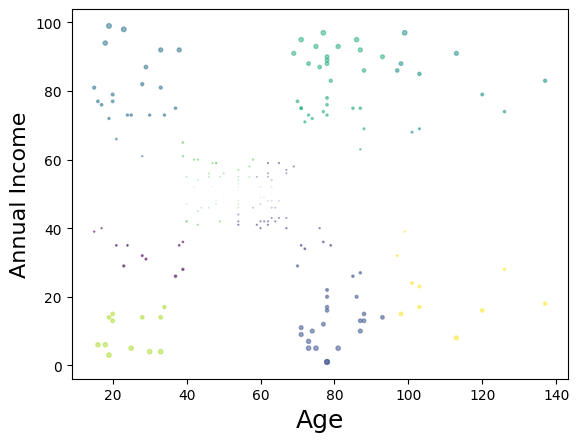

In [70]:
area = np.pi * ( x_s[:, 1])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Annual Income', fontsize=16)

plt.show()

# Hierarchical

In [75]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(x,x) 
print(dist_matrix)

[[0.         1.63050555 1.28167999 ... 4.44935328 4.72749573 4.96007568]
 [1.63050555 0.         2.91186723 ... 4.24551281 5.25987762 4.65731761]
 [1.28167999 2.91186723 0.         ... 4.95958139 4.64193658 5.50147501]
 ...
 [4.44935328 4.24551281 4.95958139 ... 0.         2.21418015 0.54622499]
 [4.72749573 5.25987762 4.64193658 ... 2.21418015 0.         2.52340145]
 [4.96007568 4.65731761 5.50147501 ... 0.54622499 2.52340145 0.        ]]


In [77]:
from scipy.cluster import hierarchy
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

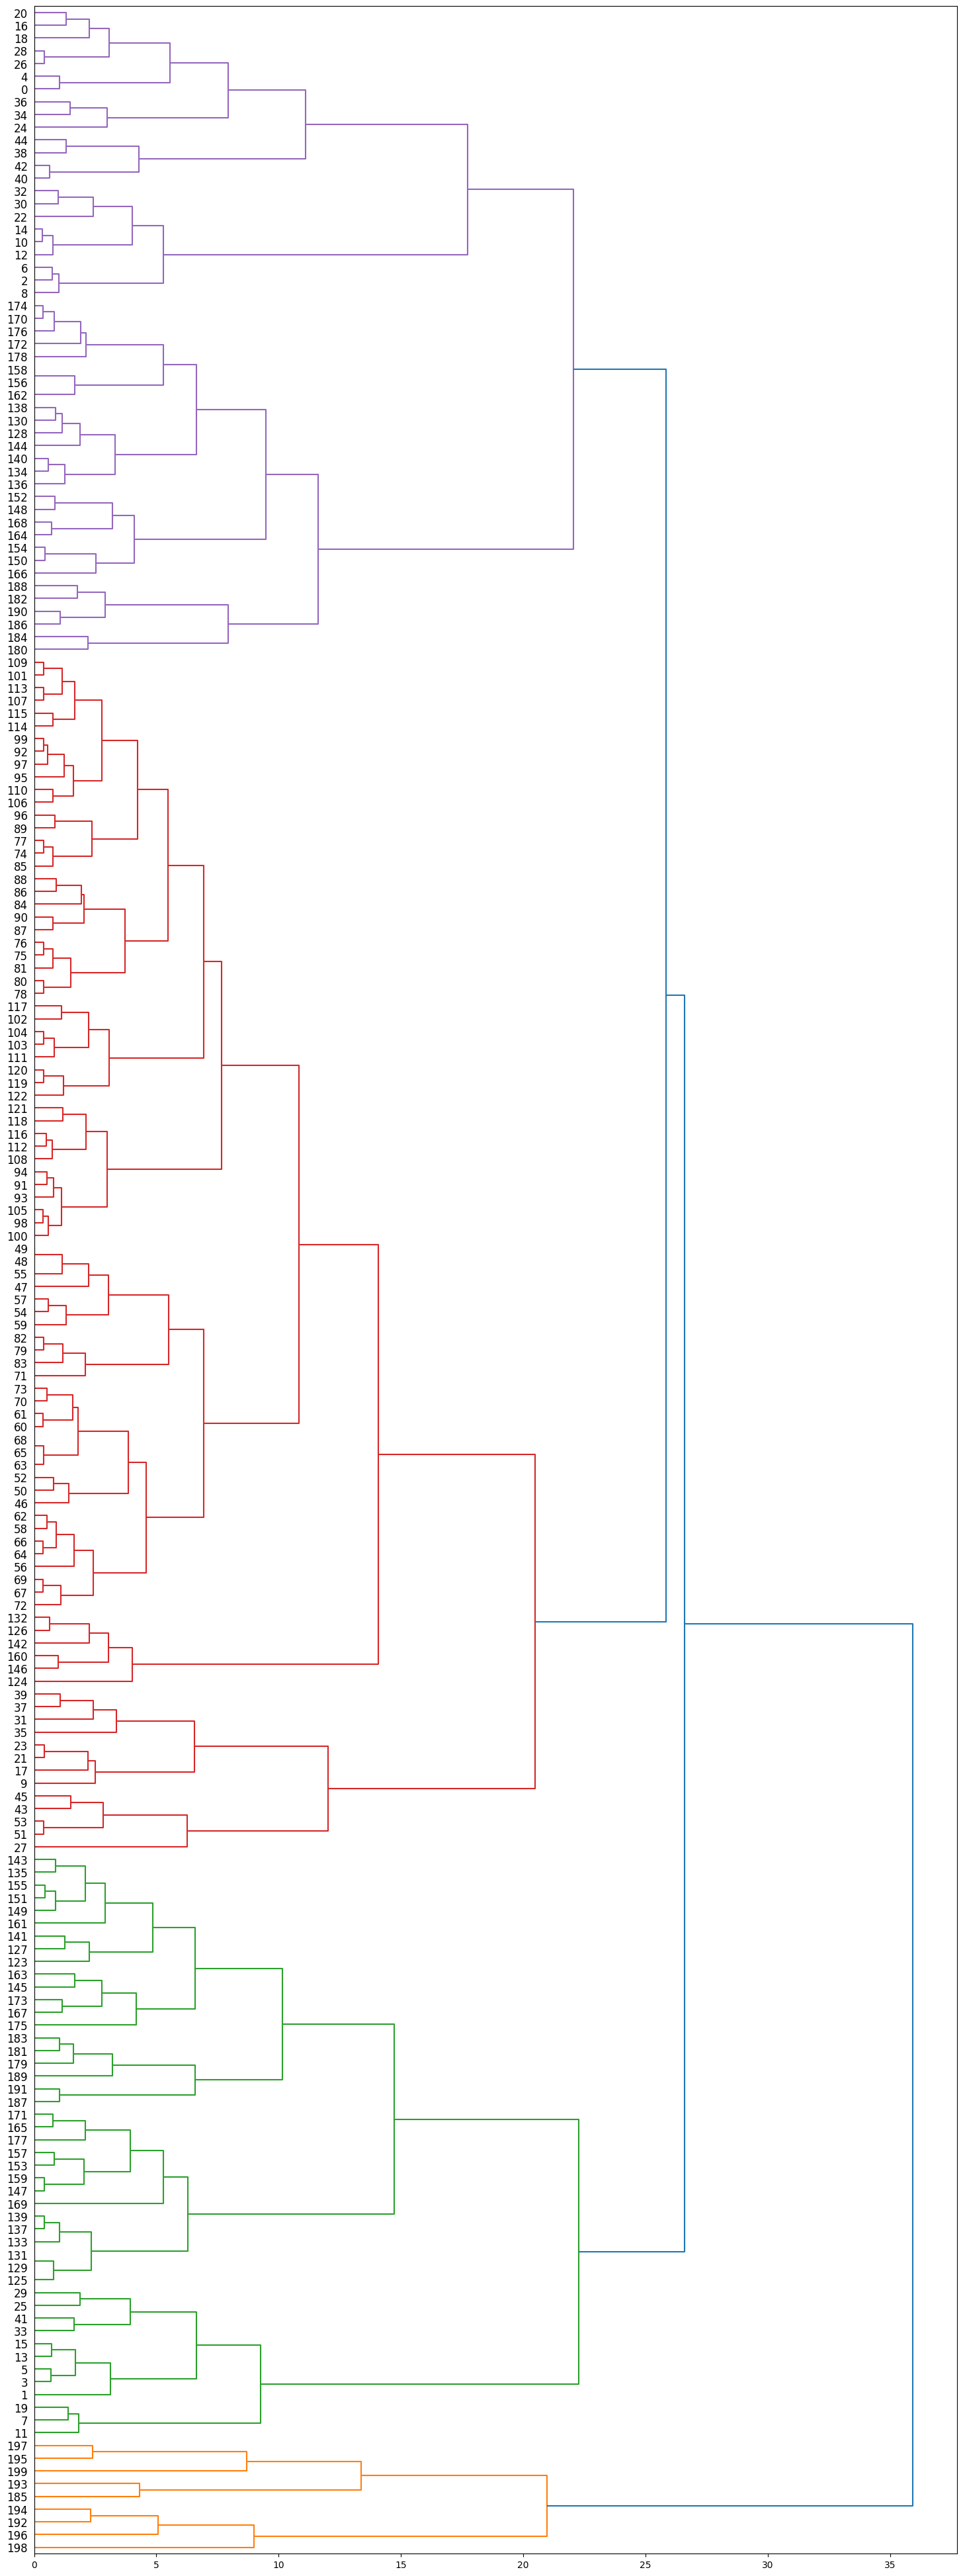

In [83]:
fig = plt.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Age'][id], df['Annual Income'][id])
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix, leaf_rotation=0, leaf_font_size =12, orientation = 'right')
